Saving cleaned_weather.csv to cleaned_weather (2).csv
Available columns in your dataset: ['date', 'p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog']


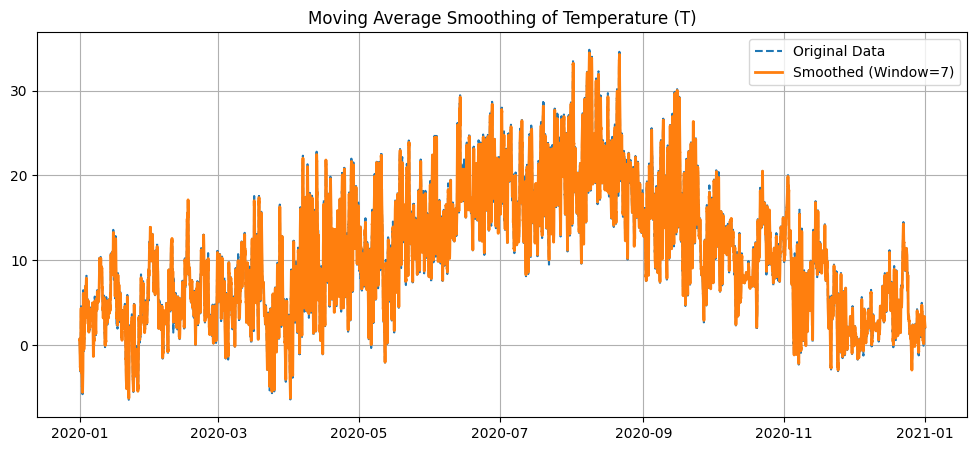

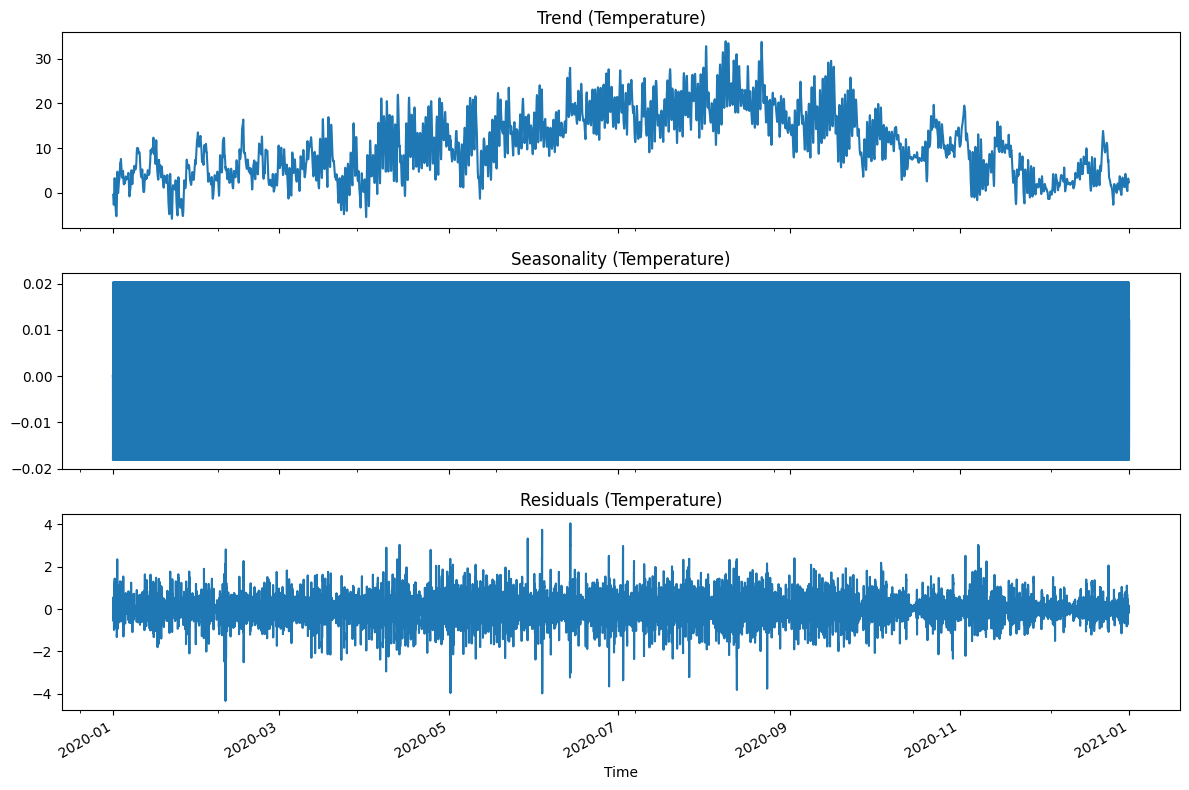

In [3]:
# Step 1: Install required library
!pip install statsmodels --quiet

# Step 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 3: Define helper functions
def moving_average_smoothing(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

def decompose_time_series(data, period):
    return seasonal_decompose(data, period=period, model='additive')

# Step 4: Upload and load the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("cleaned_weather.csv")

# Step 5: Check available columns
print("Available columns in your dataset:", df.columns.tolist())

# Step 6: Preprocess the dataset
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df = df.sort_values(by='date')

# ✅ Use 'T' (temperature) column for decomposition
time_series_data = df.set_index('date')['T']

# Step 7: Apply smoothing and decomposition
window_size = 7  # Weekly smoothing
smoothed_data = moving_average_smoothing(time_series_data, window_size)

period = 30  # Assuming daily data with monthly seasonality
decomposition = decompose_time_series(time_series_data, period)

# Step 8: Plot original vs smoothed
plt.figure(figsize=(12, 5))
plt.plot(time_series_data, label='Original Data', linestyle='dashed')
plt.plot(smoothed_data, label=f'Smoothed (Window={window_size})', linewidth=2)
plt.legend()
plt.title('Moving Average Smoothing of Temperature (T)')
plt.grid(True)
plt.show()

# Step 9: Plot decomposition
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title='Trend (Temperature)', legend=False)
decomposition.seasonal.plot(ax=axes[1], title='Seasonality (Temperature)', legend=False)
decomposition.resid.plot(ax=axes[2], title='Residuals (Temperature)', legend=False)
plt.xlabel("Time")
plt.tight_layout()
plt.show()
